<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')

In [2]:
# Leemos el conjunto de datos obtenido de la parte 1 y creamos el dataframe.
URL = 'https://drive.google.com/file/d/1AS31HdyAsw09suLoHlScD8j9XR0o-FhS/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
melb_df = pd.read_csv(path)


In [3]:
print(melb_df.columns)

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'price_avg', 'price_min', 'price_max'],
      dtype='object')


In [4]:
melb_df[:200]

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,price_avg,price_min,price_max
0,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,130.624031,28.0,900.0
1,Abbotsford,2,h,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,130.624031,28.0,900.0
2,Abbotsford,3,h,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,130.624031,28.0,900.0
3,Abbotsford,3,h,850000.0,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,130.624031,28.0,900.0
4,Abbotsford,4,h,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,130.624031,28.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Armadale,3,h,1870000.0,6.3,3143.0,1.0,1.0,217.0,116.0,1888.0,Stonnington,-37.8592,145.0182,192.463768,30.0,2445.0
196,Armadale,3,h,2050000.0,6.3,3143.0,2.0,1.0,205.0,116.0,1910.0,Stonnington,-37.8574,145.0281,192.463768,30.0,2445.0
197,Armadale,4,h,3000000.0,6.3,3143.0,2.0,2.0,1581.0,NaN,1934.0,Stonnington,-37.8580,145.0111,192.463768,30.0,2445.0
198,Armadale,5,h,1525000.0,6.3,3143.0,2.0,2.0,693.0,NaN,NaN,Stonnington,-37.8638,145.0229,192.463768,30.0,2445.0


In [5]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11418 entries, 0 to 11417
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        11418 non-null  object 
 1   Rooms         11418 non-null  int64  
 2   Type          11418 non-null  object 
 3   Price         11418 non-null  float64
 4   Distance      11418 non-null  float64
 5   Postcode      11418 non-null  float64
 6   Bathroom      11418 non-null  float64
 7   Car           11418 non-null  float64
 8   Landsize      11418 non-null  float64
 9   BuildingArea  5958 non-null   float64
 10  YearBuilt     6792 non-null   float64
 11  CouncilArea   10143 non-null  object 
 12  Lattitude     11418 non-null  float64
 13  Longtitude    11418 non-null  float64
 14  price_avg     11238 non-null  float64
 15  price_min     11238 non-null  float64
 16  price_max     11238 non-null  float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.5+ MB


## Ejercicio 0: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora al conjunto de datos).
2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB

> Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb

Sabemos que CouncilArea correponde a municipio, y Suburb corresponde a barrio o vecindario. 

Recordemos de la parte 1 que encontramos información de que cada suburbio tiene su `código postal` y que algunos suburbios comparten el mismo código postal. 

In [6]:
print("Cantidad de registros nulos en CouncilArea = {}/{}".format(melb_df.CouncilArea.isna().sum(), len(melb_df)))
print("Cantidad de valores distintos de CouncilArea = {}".format(len(melb_df.CouncilArea.unique())))
print("Cantidad de valores distintos de Suburb = {}".format(len(melb_df.Suburb.unique())))
melb_df["CouncilArea"].unique()

Cantidad de registros nulos en CouncilArea = 1275/11418
Cantidad de valores distintos de CouncilArea = 34
Cantidad de valores distintos de Suburb = 310


array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [7]:
print("Cantidad de barrios distintos sin CouncilArea = ", len(melb_df.loc[melb_df.CouncilArea.isna()].Suburb.unique()))

Cantidad de barrios distintos sin CouncilArea =  259


Vemos cuáles barrios tienen nula su respectiva CouncilArea, y qué Postcode tienen

In [8]:
(melb_df[melb_df.CouncilArea.isna()])[['Suburb', 'Postcode']]

,Suburb,Postcode
6067,Brighton East,3187.0
8895,Reservoir,3073.0
10145,Aberfeldie,3040.0
10146,Albion,3020.0
10147,Alphington,3078.0
...,...,...
11413,Westmeadows,3049.0
11414,Wheelers Hill,3150.0
11415,Williamstown,3016.0
11416,Williamstown,3016.0


In [9]:
# Creamos una lista con los Postcode distintos
null_CouncilArea_postcode_list = (melb_df[melb_df.CouncilArea.isna()]).Postcode.unique().tolist()
print(null_CouncilArea_postcode_list)

[3187.0, 3073.0, 3040.0, 3020.0, 3078.0, 3018.0, 3028.0, 3025.0, 3143.0, 3183.0, 3104.0, 3153.0, 3165.0, 3806.0, 3193.0, 3130.0, 3128.0, 3088.0, 3186.0, 3047.0, 3056.0, 3083.0, 3023.0, 3151.0, 3124.0, 3054.0, 3145.0, 3192.0, 3169.0, 3058.0, 3048.0, 3064.0, 3136.0, 3175.0, 3089.0, 3172.0, 3108.0, 3109.0, 3111.0, 3754.0, 3095.0, 3184.0, 3076.0, 3041.0, 3060.0, 3156.0, 3065.0, 3031.0, 3011.0, 3131.0, 3199.0, 3043.0, 3146.0, 3150.0, 3046.0, 3059.0, 3188.0, 3190.0, 3029.0, 3166.0, 3021.0, 3033.0, 3101.0, 3075.0, 3012.0, 3032.0, 3337.0, 3194.0, 3039.0, 3189.0, 3195.0, 3149.0, 3170.0, 3015.0, 3042.0, 3051.0, 3070.0, 3167.0, 3204.0, 3044.0, 3030.0, 3207.0, 3181.0, 3121.0, 3134.0, 3141.0, 3171.0, 3429.0, 3038.0, 3071.0, 3113.0, 3003.0, 3016.0, 3147.0, 3049.0, 3103.0, 3019.0, 3055.0, 3105.0, 3125.0, 3126.0, 3053.0, 3068.0, 3066.0, 3437.0, 3122.0, 3123.0, 3135.0, 3081.0, 3037.0, 3079.0, 3036.0, 3102.0, 3144.0, 3338.0, 3206.0, 3082.0, 3132.0, 3127.0, 3138.0, 3163.0, 3072.0, 3084.0, 3191.0, 3198.0,

In [10]:
# Creamos un dataframe con los registros con CouncilArea no nula
df_ca_not_null = melb_df[melb_df.CouncilArea.notna()]

In [11]:
# Vemos la cantidad de los distintos valores de Poscode 
len(df_ca_not_null.Postcode.unique())

192


Cuáles son los barrios que tienen el mismo Postcode que los barrios que tienen CouncilArea null, y qué CouncilArea tienen estos barrios?

In [12]:
common_zipcodes_df = df_ca_not_null.loc[df_ca_not_null.Postcode.isin(null_CouncilArea_postcode_list)]

dictionary = dict(zip(common_zipcodes_df.Postcode, common_zipcodes_df.CouncilArea))
print(len(dictionary))

165


Para cada CouncilArea nula, le vamos a asignar la CouncilArea de los barrios que tienen igual Postcode con CouncilArea no nula

In [13]:
# Creamos un dataframe con los registros que contienen a CouncilArea nula
df_ca_null = melb_df.loc[melb_df.CouncilArea.isna()]

In [14]:
df_ca_null[:5]

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,price_avg,price_min,price_max
6067,Brighton East,3,h,1270000.0,10.7,3187.0,1.0,3.0,724.0,NaN,NaN,NaN,-37.92910,145.02970,193.867925,24.0,1501.0
8895,Reservoir,3,h,526250.0,12.0,3073.0,1.0,1.0,308.0,NaN,NaN,NaN,-37.72828,145.03033,273.926471,19.0,12624.0
10145,Aberfeldie,4,h,1436000.0,7.5,3040.0,3.0,3.0,511.0,187.0,1922.0,NaN,-37.75788,144.90487,114.142857,19.0,417.0
10146,Albion,5,h,905000.0,10.5,3020.0,2.0,3.0,732.0,NaN,1925.0,NaN,-37.78345,144.82295,69.555556,22.0,199.0
10147,Alphington,4,h,1680000.0,5.7,3078.0,3.0,2.0,720.0,NaN,NaN,NaN,-37.77928,145.02993,111.202703,19.0,400.0


Creamos un diccionario con los índices de los registros con CouncilArea nula como claves, y con las CouncilAreas correspondientes como valores.

In [15]:
dict_to_replace_ca = {}
for i in range(df_ca_null.shape[0]):
  if df_ca_null.iloc[i].Postcode in dictionary.keys():
    dict_to_replace_ca.update({df_ca_null.index[i]: dictionary[df_ca_null.iloc[i].Postcode]})

len(dict_to_replace_ca)

1273

In [16]:
dict_to_replace_ca

{6067: 'Bayside',
 8895: 'Darebin',
 10145: 'Moonee Valley',
 10146: 'Brimbank',
 10147: 'Darebin',
 10148: 'Hobsons Bay',
 10149: 'Hobsons Bay',
 10150: 'Hobsons Bay',
 10151: 'Stonnington',
 10152: 'Stonnington',
 10153: 'Port Phillip',
 10154: 'Boroondara',
 10155: 'Boroondara',
 10156: 'Boroondara',
 10157: 'Boroondara',
 10158: 'Knox',
 10159: 'Glen Eira',
 10160: 'Glen Eira',
 10161: 'Casey',
 10162: 'Bayside',
 10163: 'Whitehorse',
 10164: 'Whitehorse',
 10165: 'Whitehorse',
 10166: 'Whitehorse',
 10167: 'Whitehorse',
 10168: 'Banyule',
 10169: 'Bayside',
 10170: 'Bayside',
 10171: 'Bayside',
 10172: 'Bayside',
 10173: 'Bayside',
 10174: 'Hume',
 10175: 'Moreland',
 10176: 'Moreland',
 10177: 'Banyule',
 10178: 'Banyule',
 10179: 'Banyule',
 10180: 'Melton',
 10181: 'Whitehorse',
 10182: 'Boroondara',
 10183: 'Boroondara',
 10184: 'Yarra',
 10185: 'Stonnington',
 10186: 'Kingston',
 10187: 'Kingston',
 10188: 'Moreland',
 10189: 'Moreland',
 10190: 'Moreland',
 10191: 'Moreland'

In [17]:
df_ca_null.shape

(1275, 17)

In [18]:
melb_df.CouncilArea

0        Yarra
1        Yarra
2        Yarra
3        Yarra
4        Yarra
         ...  
11413      NaN
11414      NaN
11415      NaN
11416      NaN
11417      NaN
Name: CouncilArea, Length: 11418, dtype: object

Reemplazamos los valores nulos de CouncilArea por los valores del diccionario creado

In [19]:
melb_df['CouncilArea'] = melb_df['CouncilArea'].fillna(dict_to_replace_ca)

In [20]:
melb_df.CouncilArea

0              Yarra
1              Yarra
2              Yarra
3              Yarra
4              Yarra
            ...     
11413           Hume
11414         Monash
11415    Hobsons Bay
11416    Hobsons Bay
11417    Maribyrnong
Name: CouncilArea, Length: 11418, dtype: object

In [21]:
print("Cantidad de registros nulos en CouncilArea de melb_df = {}/{}".format(melb_df.CouncilArea.isna().sum(), len(melb_df)))

Cantidad de registros nulos en CouncilArea de melb_df = 2/11418


In [22]:
(melb_df[melb_df.CouncilArea.isna()])[['Suburb', 'Postcode']]

,Suburb,Postcode
10747,Wallan,3756.0
11339,Monbulk,3793.0


In [23]:
last_nulls_indexes = (melb_df[melb_df.CouncilArea.isna()])[['Suburb', 'Postcode']].index.tolist()
last_nulls_indexes

[10747, 11339]

Vemos las CouncilAreas de un grupo de postcodes cercano para cada uno de los postcodes que quedaron nulos

In [24]:
(melb_df[((melb_df.Postcode > 3756.0) & (melb_df.Postcode < 3760.0)) |
         ((melb_df.Postcode < 3756.0) & (melb_df.Postcode > 3752.0))])[['Suburb', 'Postcode', 'CouncilArea']][:10]

,Suburb,Postcode,CouncilArea
7084,Doreen,3754.0,Whittlesea
7156,Mernda,3754.0,Whittlesea
7157,Mernda,3754.0,Whittlesea
7824,Mernda,3754.0,Whittlesea
7825,Mernda,3754.0,Whittlesea
9186,Mernda,3754.0,Whittlesea
9453,Mernda,3754.0,Whittlesea
9935,Doreen,3754.0,Whittlesea
9936,Doreen,3754.0,Whittlesea
10139,Whittlesea,3757.0,Whittlesea


In [25]:
(melb_df[((melb_df.Postcode > 3793.0) & (melb_df.Postcode < 3798.0)) |
         ((melb_df.Postcode < 3793.0) & (melb_df.Postcode > 3785.0))])[['Suburb', 'Postcode', 'CouncilArea']]

,Suburb,Postcode,CouncilArea
8145,Mount Evelyn,3796.0,Yarra Ranges
10904,Mount Evelyn,3796.0,Yarra Ranges


Verificamos que Molbulk tiene municipio Yarra Ranges en [esta fuente](https://en.wikipedia.org/wiki/Wallan).

A su vez, encontramos que Wallan tiene municipio Mitchell en [esta fuente](https://en.wikipedia.org/wiki/Monbulk,_Victoria), el cual es diferente a Whittlesea, así que optaremos por asignar el de la fuente en este caso.

In [26]:
# Asignamos sus respectivas CouncilAreas
values_for_last_nans = { last_nulls_indexes[0]: 'Mitchell', last_nulls_indexes[1]: 'Yarra Ranges'} 
melb_df['CouncilArea'] = melb_df['CouncilArea'].fillna(values_for_last_nans)

In [27]:
print("Cantidad de registros nulos en CouncilArea de melb_df = {}/{}".format(melb_df.CouncilArea.isna().sum(), len(melb_df)))

Cantidad de registros nulos en CouncilArea de melb_df = 0/11418


> Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB

In [28]:
print("Cantidad de registros nulos en price_avg = {}/{}".format(melb_df.price_avg.isna().sum(), len(melb_df)))
print("Cantidad de registros nulos en price_min = {}/{}".format(melb_df.price_min.isna().sum(), len(melb_df)))
print("Cantidad de registros nulos en price_max = {}/{}".format(melb_df.price_max.isna().sum(), len(melb_df)))

Cantidad de registros nulos en price_avg = 180/11418
Cantidad de registros nulos en price_min = 180/11418
Cantidad de registros nulos en price_max = 180/11418


In [29]:
melb_df[['Suburb','price_avg','price_min','price_max']]

,Suburb,price_avg,price_min,price_max
0,Abbotsford,130.624031,28.0,900.0
1,Abbotsford,130.624031,28.0,900.0
2,Abbotsford,130.624031,28.0,900.0
3,Abbotsford,130.624031,28.0,900.0
4,Abbotsford,130.624031,28.0,900.0
...,...,...,...,...
11413,Westmeadows,92.285714,40.0,281.0
11414,Wheelers Hill,124.026455,0.0,599.0
11415,Williamstown,191.094595,60.0,995.0
11416,Williamstown,191.094595,60.0,995.0


Calculamos el PRECIO PROMEDIO, PRECIO MIN y PRECIO MAX del DataFrame, y asignamos estos valores a los valores nulos de las columnas `price_avg`, `price_min`, `price_max`, respectivamente.

In [30]:
mean = melb_df['price_avg'].mean()
min = melb_df['price_min'].min()
print(min)
max = melb_df['price_max'].max()
melb_df.price_avg = melb_df.price_avg.fillna(mean)
melb_df.price_min = melb_df.price_min.fillna(min)
melb_df.price_max = melb_df.price_max.fillna(max)
melb_df[['Suburb','price_avg','price_min','price_max']]

0.0


,Suburb,price_avg,price_min,price_max
0,Abbotsford,130.624031,28.0,900.0
1,Abbotsford,130.624031,28.0,900.0
2,Abbotsford,130.624031,28.0,900.0
3,Abbotsford,130.624031,28.0,900.0
4,Abbotsford,130.624031,28.0,900.0
...,...,...,...,...
11413,Westmeadows,92.285714,40.0,281.0
11414,Wheelers Hill,124.026455,0.0,599.0
11415,Williamstown,191.094595,60.0,995.0
11416,Williamstown,191.094595,60.0,995.0


In [31]:
print("Cantidad de registros nulos en price_avg = {}/{}".format(melb_df.price_avg.isna().sum(), len(melb_df)))
print("Cantidad de registros nulos en price_min = {}/{}".format(melb_df.price_min.isna().sum(), len(melb_df)))
print("Cantidad de registros nulos en price_max = {}/{}".format(melb_df.price_max.isna().sum(), len(melb_df)))

Cantidad de registros nulos en price_avg = 0/11418
Cantidad de registros nulos en price_min = 0/11418
Cantidad de registros nulos en price_max = 0/11418


DOCUMENTACION EJERCICIO 0

  ### Transformaciones:
  1. La columna `CouncilArea` fue imputada de acuerdo a `Suburb` y `Postcode`. Para cada CouncilArea nula, se asignó la CouncilArea de los suburbios con CouncilArea **no nula** que tienen **igual Postcode** que los suburbios con CouncilArea **nula**. Luego de esta imputación, quedaron **dos** registros sin CouncilArea, para los cuales, encontramos en internet la CouncilArea según los suburbios de los mismos; un valor de estos últimos coincidía con la CouncilArea de suburbios con Postcode más cercano que se analizó.
  2. La columna `price_avg` fue imputada utilizando el precio promedio del dataframe.
  3. Las columnas `price_min` utilizando el precio mínimo del dataframe.
  4. La columna `price_max` utilizando el precio máximo del dataframe.

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [32]:
from sklearn.preprocessing import OneHotEncoder


In [33]:
melb_reduced_df = melb_df.copy(deep=True)
melb_reduced_df.drop('BuildingArea', inplace=True, axis=1)
melb_reduced_df.drop('YearBuilt', inplace=True, axis=1)
melb_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11418 entries, 0 to 11417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       11418 non-null  object 
 1   Rooms        11418 non-null  int64  
 2   Type         11418 non-null  object 
 3   Price        11418 non-null  float64
 4   Distance     11418 non-null  float64
 5   Postcode     11418 non-null  float64
 6   Bathroom     11418 non-null  float64
 7   Car          11418 non-null  float64
 8   Landsize     11418 non-null  float64
 9   CouncilArea  11418 non-null  object 
 10  Lattitude    11418 non-null  float64
 11  Longtitude   11418 non-null  float64
 12  price_avg    11418 non-null  float64
 13  price_min    11418 non-null  float64
 14  price_max    11418 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.3+ MB


In [34]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11418 entries, 0 to 11417
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        11418 non-null  object 
 1   Rooms         11418 non-null  int64  
 2   Type          11418 non-null  object 
 3   Price         11418 non-null  float64
 4   Distance      11418 non-null  float64
 5   Postcode      11418 non-null  float64
 6   Bathroom      11418 non-null  float64
 7   Car           11418 non-null  float64
 8   Landsize      11418 non-null  float64
 9   BuildingArea  5958 non-null   float64
 10  YearBuilt     6792 non-null   float64
 11  CouncilArea   11418 non-null  object 
 12  Lattitude     11418 non-null  float64
 13  Longtitude    11418 non-null  float64
 14  price_avg     11418 non-null  float64
 15  price_min     11418 non-null  float64
 16  price_max     11418 non-null  float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.5+ MB


In [35]:
categorical_cols = ['Type','Suburb','CouncilArea']
#numerical_cols = ['Rooms','Price','Distance','Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuild', 'Lattitude', 'Longtitude', 'price_avg', 'price_min', 'price_max']
numerical_cols = ['Rooms','Price','Distance','Postcode', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'price_avg', 'price_min', 'price_max']

In [36]:
melb_reduced_df[categorical_cols].nunique()

Type             3
Suburb         310
CouncilArea     34
dtype: int64

In [37]:
# Verificamos NULOS
melb_reduced_df[categorical_cols].isna().sum()

Type           0
Suburb         0
CouncilArea    0
dtype: int64

In [38]:
# Codificamos columnas categoricas
new_columns=[]
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_reduced_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

Matrix has shape (11418, 347), with columns: ['Type=h', 'Type=t', 'Type=u', 'Suburb=Abbotsford', 'Suburb=Aberfeldie', 'Suburb=Airport West', 'Suburb=Albanvale', 'Suburb=Albert Park', 'Suburb=Albion', 'Suburb=Alphington', 'Suburb=Altona', 'Suburb=Altona Meadows', 'Suburb=Altona North', 'Suburb=Ardeer', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Ashburton', 'Suburb=Ashwood', 'Suburb=Aspendale', 'Suburb=Aspendale Gardens', 'Suburb=Attwood', 'Suburb=Avondale Heights', 'Suburb=Bacchus Marsh', 'Suburb=Balaclava', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bayswater', 'Suburb=Bayswater North', 'Suburb=Beaconsfield', 'Suburb=Beaconsfield Upper', 'Suburb=Beaumaris', 'Suburb=Bellfield', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Berwick', 'Suburb=Black Rock', 'Suburb=Blackburn', 'Suburb=Blackburn North', 'Suburb=Blackburn South', 'Suburb=Bonbeach', 'Suburb=Boronia', 'Suburb=Box Hill', 'Suburb=Braybrook', 'Suburb=Briar Hill', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=

In [39]:
# Agregamos columnas numericas
X = np.hstack([X_cat, melb_reduced_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

Matrix has shape (11418, 347), with columns: ['Type=h', 'Type=t', 'Type=u', 'Suburb=Abbotsford', 'Suburb=Aberfeldie', 'Suburb=Airport West', 'Suburb=Albanvale', 'Suburb=Albert Park', 'Suburb=Albion', 'Suburb=Alphington', 'Suburb=Altona', 'Suburb=Altona Meadows', 'Suburb=Altona North', 'Suburb=Ardeer', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Ashburton', 'Suburb=Ashwood', 'Suburb=Aspendale', 'Suburb=Aspendale Gardens', 'Suburb=Attwood', 'Suburb=Avondale Heights', 'Suburb=Bacchus Marsh', 'Suburb=Balaclava', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bayswater', 'Suburb=Bayswater North', 'Suburb=Beaconsfield', 'Suburb=Beaconsfield Upper', 'Suburb=Beaumaris', 'Suburb=Bellfield', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Berwick', 'Suburb=Black Rock', 'Suburb=Blackburn', 'Suburb=Blackburn North', 'Suburb=Blackburn South', 'Suburb=Bonbeach', 'Suburb=Boronia', 'Suburb=Box Hill', 'Suburb=Braybrook', 'Suburb=Briar Hill', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=

In [40]:
melb_reduced_df = pd.DataFrame(data=X, columns=new_columns)
melb_reduced_df

,Type=h,Type=t,Type=u,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,...,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,price_avg,price_min,price_max
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,3067.0,1.0,1.0,202.0,-37.79960,144.99840,130.624031,28.0,900.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,3067.0,1.0,0.0,156.0,-37.80790,144.99340,130.624031,28.0,900.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,3067.0,2.0,0.0,134.0,-37.80930,144.99440,130.624031,28.0,900.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,3067.0,2.0,1.0,94.0,-37.79690,144.99690,130.624031,28.0,900.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,3067.0,1.0,2.0,120.0,-37.80720,144.99410,130.624031,28.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11413,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.5,3049.0,2.0,2.0,256.0,-37.67917,144.89390,92.285714,40.0,281.0
11414,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.7,3150.0,2.0,2.0,652.0,-37.90562,145.16761,124.026455,0.0,599.0
11415,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.8,3016.0,2.0,2.0,333.0,-37.85927,144.87904,191.094595,60.0,995.0
11416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.8,3016.0,2.0,4.0,436.0,-37.85274,144.88738,191.094595,60.0,995.0


In [41]:
melb_reduced_df.shape 

(11418, 359)

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

Graficamos antes de imputar


In [42]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
import missingno as msno
from sklearn.preprocessing import StandardScaler

#se se estandariza y se escala nuestro dataset
scaler = StandardScaler()
scaler_T = StandardScaler()

melb_data_mice = np.hstack([X, melb_df[['BuildingArea','YearBuilt']].values])
new_columns.extend(['BuildingArea','YearBuilt'])


In [43]:
melb_data_mice_s = melb_data_mice.copy()
melb_data_mice_s = scaler.fit_transform(melb_data_mice_s)
melb_data_mice_knr = pd.DataFrame(data=melb_data_mice_s, columns=new_columns)

melb_data_mice_knr_T = pd.DataFrame(data=melb_data_mice, columns=new_columns)
columnas_T=['Type=h', 'Type=t', 'Type=u','Rooms','Price','Distance',
            'Postcode', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 
            'Longtitude', 'price_avg', 'price_min', 'price_max',
            'BuildingArea', 'YearBuilt']
melb_data_mice_knr_T = melb_data_mice_knr_T[columnas_T]
melb_data_mice_knr_T = scaler_T.fit_transform(melb_data_mice_knr_T)
melb_data_mice_knr_T = pd.DataFrame(data=melb_data_mice_knr_T, columns=columnas_T)

####Imputacion Multiple usando método KNeighborsRegressor. Nos basamos en el dataframe X que contiene los datos previamente codificados con ONE-HOT ENCODING.

In [44]:
melb_data_mice = pd.DataFrame(data=melb_data_mice, columns=new_columns)

In [45]:
melb_data_mice

,Type=h,Type=t,Type=u,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,...,Bathroom,Car,Landsize,Lattitude,Longtitude,price_avg,price_min,price_max,BuildingArea,YearBuilt
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,202.0,-37.79960,144.99840,130.624031,28.0,900.0,NaN,NaN
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,156.0,-37.80790,144.99340,130.624031,28.0,900.0,79.0,1900.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,134.0,-37.80930,144.99440,130.624031,28.0,900.0,150.0,1900.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,94.0,-37.79690,144.99690,130.624031,28.0,900.0,NaN,NaN
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,120.0,-37.80720,144.99410,130.624031,28.0,900.0,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11413,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,256.0,-37.67917,144.89390,92.285714,40.0,281.0,NaN,NaN
11414,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,652.0,-37.90562,145.16761,124.026455,0.0,599.0,NaN,1981.0
11415,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,333.0,-37.85927,144.87904,191.094595,60.0,995.0,133.0,1995.0
11416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,436.0,-37.85274,144.88738,191.094595,60.0,995.0,NaN,1997.0


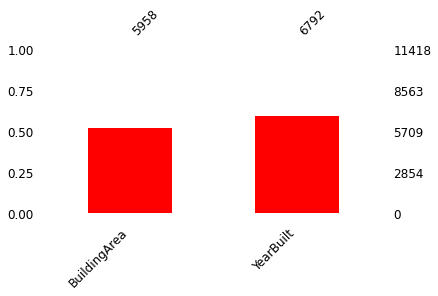

In [46]:
msno.bar(melb_data_mice[['YearBuilt','BuildingArea']],figsize=(6, 3), sort="ascending",fontsize=12, color='r')

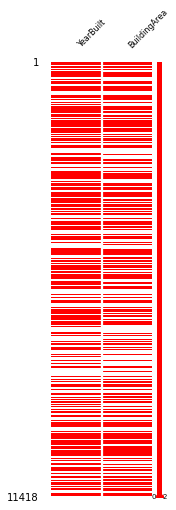

In [47]:
msno.matrix(melb_data_mice[['YearBuilt','BuildingArea']],figsize=(2, 8),fontsize=8, color=[1,0,0])

####Imputacion con KNeighborsRegressor

In [48]:
mice_imputer = IterativeImputer(random_state=42, estimator=KNeighborsRegressor())
melb_data_mice_knr[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice_knr[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [49]:
melb_data_mice_knr = scaler.inverse_transform(melb_data_mice_knr)

In [50]:
melb_data_mice_knr = pd.DataFrame(data=melb_data_mice_knr, columns=new_columns)

In [51]:
melb_data_mice_knr

,Type=h,Type=t,Type=u,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,...,Bathroom,Car,Landsize,Lattitude,Longtitude,price_avg,price_min,price_max,BuildingArea,YearBuilt
0,1.0,-1.387779e-17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,202.0,-37.79960,144.99840,130.624031,2.800000e+01,900.0,110.6,1970.6
1,1.0,-1.387779e-17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,156.0,-37.80790,144.99340,130.624031,2.800000e+01,900.0,79.0,1900.0
2,1.0,-1.387779e-17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,134.0,-37.80930,144.99440,130.624031,2.800000e+01,900.0,150.0,1900.0
3,1.0,-1.387779e-17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,94.0,-37.79690,144.99690,130.624031,2.800000e+01,900.0,110.6,1970.6
4,1.0,-1.387779e-17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,120.0,-37.80720,144.99410,130.624031,2.800000e+01,900.0,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11413,1.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,256.0,-37.67917,144.89390,92.285714,4.000000e+01,281.0,110.6,1970.6
11414,1.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,652.0,-37.90562,145.16761,124.026455,3.552714e-15,599.0,162.8,1981.0
11415,1.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,333.0,-37.85927,144.87904,191.094595,6.000000e+01,995.0,133.0,1995.0
11416,1.0,-1.387779e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,436.0,-37.85274,144.88738,191.094595,6.000000e+01,995.0,226.4,1997.0


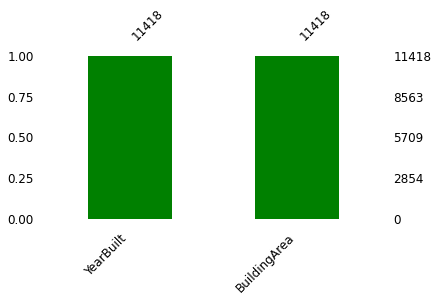

In [52]:
#msno.bar(melb_data_mice_knr,figsize=(12, 6), fontsize=12, sort="ascending",fontsize=12, color='tomato')
msno.bar(melb_data_mice_knr[['YearBuilt','BuildingArea']],figsize=(6, 3), sort="ascending",fontsize=12, color='g')

Entrenamos el algoritmo con todas las variables

In [53]:
melb_data_mice_knr_T = mice_imputer.fit_transform(melb_data_mice_knr_T)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [54]:
melb_data_mice_knr_T = scaler_T.inverse_transform(melb_data_mice_knr_T)

In [55]:
melb_data_mice_knr_T = pd.DataFrame(data = melb_data_mice_knr_T, columns = columnas_T)
melb_data_mice_knr_T

,Type=h,Type=t,Type=u,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,price_avg,price_min,price_max,BuildingArea,YearBuilt
0,1.0,-1.387779e-17,0.0,2.0,1480000.0,2.5,3067.0,1.0,1.0,202.0,-37.79960,144.99840,130.624031,2.800000e+01,900.0,91.8,1906.0
1,1.0,-1.387779e-17,0.0,2.0,1035000.0,2.5,3067.0,1.0,0.0,156.0,-37.80790,144.99340,130.624031,2.800000e+01,900.0,79.0,1900.0
2,1.0,-1.387779e-17,0.0,3.0,1465000.0,2.5,3067.0,2.0,0.0,134.0,-37.80930,144.99440,130.624031,2.800000e+01,900.0,150.0,1900.0
3,1.0,-1.387779e-17,0.0,3.0,850000.0,2.5,3067.0,2.0,1.0,94.0,-37.79690,144.99690,130.624031,2.800000e+01,900.0,127.0,1932.4
4,1.0,-1.387779e-17,0.0,4.0,1600000.0,2.5,3067.0,1.0,2.0,120.0,-37.80720,144.99410,130.624031,2.800000e+01,900.0,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11413,1.0,-1.387779e-17,0.0,3.0,582000.0,16.5,3049.0,2.0,2.0,256.0,-37.67917,144.89390,92.285714,4.000000e+01,281.0,144.4,1986.0
11414,1.0,-1.387779e-17,0.0,4.0,1245000.0,16.7,3150.0,2.0,2.0,652.0,-37.90562,145.16761,124.026455,3.552714e-15,599.0,168.4,1981.0
11415,1.0,-1.387779e-17,0.0,3.0,1031000.0,6.8,3016.0,2.0,2.0,333.0,-37.85927,144.87904,191.094595,6.000000e+01,995.0,133.0,1995.0
11416,1.0,-1.387779e-17,0.0,3.0,1170000.0,6.8,3016.0,2.0,4.0,436.0,-37.85274,144.88738,191.094595,6.000000e+01,995.0,203.8,1997.0


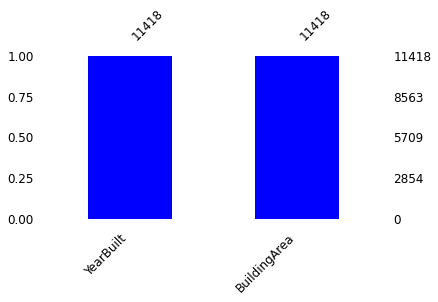

In [56]:
msno.bar(melb_data_mice_knr_T[['YearBuilt','BuildingArea']],figsize=(6, 3), sort="ascending",fontsize=12, color='b')

### **Graficos de distrubucion** antes y despues de imputar

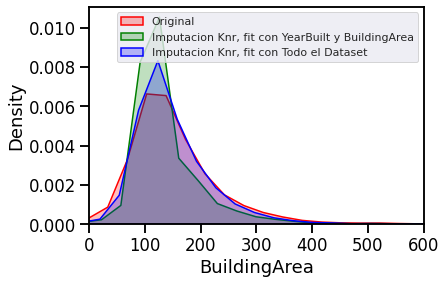

In [57]:
sns.kdeplot(melb_data_mice['BuildingArea'],color='r', shade=True, cbar=True)
sns.kdeplot(melb_data_mice_knr['BuildingArea'],color='g', shade=True, cbar=True)
sns.kdeplot(melb_data_mice_knr_T['BuildingArea'], color='b', shade=True, cbar=True)
sns.set(rc = {'figure.figsize': (15,8)})
plt.xlim(0,600)
plt.legend(labels=["Original","Imputacion Knr, fit con YearBuilt y BuildingArea", "Imputacion Knr, fit con Todo el Dataset"])
plt.show()

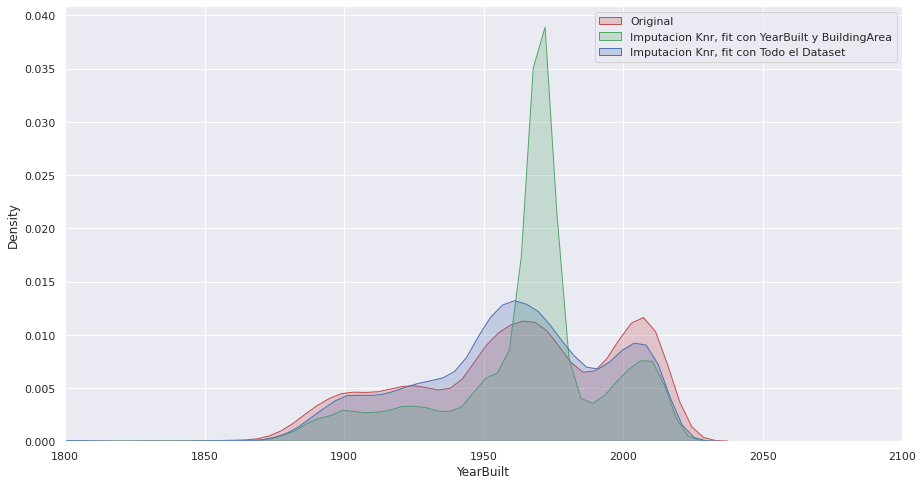

In [58]:
sns.kdeplot(melb_data_mice['YearBuilt'],color='r', shade=True, cbar=True )
sns.kdeplot(melb_data_mice_knr['YearBuilt'],color='g', shade=True, cbar=True)
sns.kdeplot(melb_data_mice_knr_T['YearBuilt'],color='b', shade=True, cbar=True)
plt.xlim(1800,2100)
plt.legend(labels=["Original","Imputacion Knr, fit con YearBuilt y BuildingArea", "Imputacion Knr, fit con Todo el Dataset"])
sns.set(rc = {'figure.figsize': (15,8)})
plt.show()

Como conclusion podemos ver como la distribucion del dataset impu

 Agregamos las columnas imputadas(con todo el dataset) Yearbuilt y BuildingArea  al dataset original

In [59]:
melb_data_mice_knn = np.hstack([X, melb_data_mice_knr_T[['BuildingArea','YearBuilt']].values])


In [60]:
melb_data_mice_knn = pd.DataFrame(data=melb_data_mice_knn, columns=new_columns)
melb_data_mice_knn

,Type=h,Type=t,Type=u,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,...,Bathroom,Car,Landsize,Lattitude,Longtitude,price_avg,price_min,price_max,BuildingArea,YearBuilt
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,202.0,-37.79960,144.99840,130.624031,28.0,900.0,91.8,1906.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,156.0,-37.80790,144.99340,130.624031,28.0,900.0,79.0,1900.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,134.0,-37.80930,144.99440,130.624031,28.0,900.0,150.0,1900.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,94.0,-37.79690,144.99690,130.624031,28.0,900.0,127.0,1932.4
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,120.0,-37.80720,144.99410,130.624031,28.0,900.0,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11413,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,256.0,-37.67917,144.89390,92.285714,40.0,281.0,144.4,1986.0
11414,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,652.0,-37.90562,145.16761,124.026455,0.0,599.0,168.4,1981.0
11415,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,333.0,-37.85927,144.87904,191.094595,60.0,995.0,133.0,1995.0
11416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,436.0,-37.85274,144.88738,191.094595,60.0,995.0,203.8,1997.0


## Ejercicio 3: Reducción de dimensionalidad

Utilizando la matriz obtenida en el ejercicio anterior:

3.1 Aplique PCA para obtener  n  componentes principales de la matriz, donde n = min(20, X.shape[0]). ¿Es necesario estandarizar o escalar los datos?


3.2 Grafique la varianza capturada por los primeros  n  componentes principales, para cada  n .

3.3 En base al gráfico, seleccione las primeras  m  columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.



In [61]:
#Trabajamos con la matriz obtenida en el punto 2 en donde se agregan 'BuildingArea','YearBuilt' cuyos valores faltantes fueron imputados  teniendo en cuenta todas las columnas
melb_data_mice_knn.shape

(11418, 361)

El proceso de PCA identifica aquellas direcciones en las que la varianza es mayor. Como la varianza de una variable se mide en su misma escala elevada al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media 0 y desviación estándar 1, aquellas variables cuya escala sea mayor dominarán al resto.

Para lo cual primero escalamos los datos entre -1 y 1 usando `MinMaxScaler`. 

In [62]:
# pre-procesamos los datos escalando de -1 a 1
# 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_melb_data_mice_knn = scaler.fit_transform(melb_data_mice_knn)
np.max(scaled_melb_data_mice_knn), np.min(scaled_melb_data_mice_knn)

(1.0000000000000009, -1.0)

Inicializamos PCA con n=20, que proporciona las primeras 20 componentes principales, sus varianzas y proporción de varianza, está última nos da una estima de que % de los datos es explicada por dicha componente

In [63]:

from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(scaled_melb_data_mice_knn)
proyected_features = pca.transform(scaled_melb_data_mice_knn)

print("Principal components")
print(pca.components_)
print("Explained variance: ")
print(pca.explained_variance_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[-7.91885924e-01  2.78112762e-01  5.13773162e-01 ...  1.60595555e-02
  -6.94094157e-03  3.21977728e-02]
 [ 5.67363828e-02 -2.46103945e-01  1.89367562e-01 ...  4.03872757e-01
  -2.24930132e-03 -9.40338637e-03]
 [ 1.12580241e-02 -5.29684858e-02  4.17104617e-02 ... -1.18247791e-01
   8.17355332e-03  8.84910146e-05]
 ...
 [ 8.31470774e-03  1.96953405e-03 -1.02842418e-02 ...  1.13365144e-01
  -2.37142376e-04  4.95824098e-03]
 [-3.77756587e-02  9.12441932e-04  3.68632168e-02 ... -1.50999031e-01
   4.02971366e-03 -9.15388814e-03]
 [ 8.29141488e-04  7.76331742e-03 -8.59245891e-03 ... -1.96549729e-02
  -5.78231405e-03  3.70411280e-02]]
Explained variance: 
[1.02184921 0.47331527 0.4335691  0.39610638 0.38493151 0.34884859
 0.29319182 0.26248239 0.24437758 0.2384956  0.20782383 0.19855495
 0.18383545 0.1819059  0.17499696 0.16401984 0.1522938  0.14428414
 0.13974733 0.12155908]
Explained variance ratio
[0.10341363 0.04790066 0.04387825 0.04008693 0.03895601 0.03530433
 0.02

In [64]:
proyected_features.shape #corroboramos la dimensión de la matriz de salida

(11418, 20)

Se observa que *Explained variance ratio* de PC1 es del  10.3%, mientras el correspondiente a la segunda componente explica el 4.8%, disminuyendo los porcentajes cuando se consideran las siguientes componentes como es esperado. 





Antes de ver el comportamiento de las componentes,  estandarizamos (`StanderScaler`) la muestra en vez de ecalonar para ver cual de los dos procesamientos de datos obtiene un mayor % de varianza explicada de las componentes principales.

In [65]:
# TODO Here we have to pre-process the matrix before applying PCA
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
stdandard_melb_data_mice_knn = std_scaler.fit_transform(melb_data_mice_knn)
np.max(stdandard_melb_data_mice_knn), np.min(stdandard_melb_data_mice_knn)

(106.85036265731779, -22.046656497971405)

In [66]:
stdandard_melb_data_mice_knn.shape

(11418, 361)

In [67]:
#Inicializamos PCA con n=20, que proporciona las primeras 20 componentes principales, sus varianzas y proporción de varianza, está última nos da una estima de que % de los datos es
#explicada por dicha componente
from sklearn.decomposition import PCA
pca_std = PCA(n_components=20)
pca_std.fit(stdandard_melb_data_mice_knn)
proyected_features1_std = pca.transform(stdandard_melb_data_mice_knn)

print("Principal components")
print(pca_std.components_)
print("Explained variance: ")
print(pca_std.explained_variance_)
print("Explained variance ratio")
print(pca_std.explained_variance_ratio_)
#proyected_features1_std.shape

Principal components
[[ 7.09418642e-02 -1.34129274e-02 -7.66519636e-02 ... -1.42877221e-02
   1.67106209e-01  5.14203851e-02]
 [ 4.69546060e-02  1.55338645e-02 -7.17189258e-02 ... -1.46394012e-01
   2.47837668e-02  2.52787110e-01]
 [ 3.23252731e-01 -1.03899172e-01 -3.12494487e-01 ... -1.47165098e-01
   2.49092080e-01 -1.40190508e-01]
 ...
 [ 1.46776394e-02  1.03336907e-02 -2.71277745e-02 ...  1.49956503e-02
  -4.01910027e-03 -2.19830545e-02]
 [-2.57444514e-02  3.00777260e-02  6.14507636e-03 ...  6.56211957e-03
  -2.26776681e-04  3.39090641e-02]
 [ 1.38498338e-02 -1.44882721e-02 -4.76103038e-03 ... -4.70903508e-03
  -1.41611167e-02 -3.03135893e-02]]
Explained variance: 
[4.42109243 3.48596014 3.26201845 2.96078678 2.72593718 2.42083791
 2.38322828 2.29898418 2.11177338 2.0823522  2.06859454 2.0601344
 2.03890923 2.0352224  2.0263762  2.01956629 2.01235725 2.00971432
 2.00341604 2.00061766]
Explained variance ratio
[0.01224572 0.00965555 0.00903527 0.00820091 0.00755041 0.00670533
 0.006

In [68]:
proyected_features.shape #corroboramos la dimensión de la matriz de salida

(11418, 20)

Se observa que *Explained variance ratio* de la primera componente PC1 es del  1.2%, mientras el correspondiente a la segunda componente explica el 0.9%,
disminuyendo los porcentajes cuando se consideran las siguientes componentes como es esperado según el método aplicado.

En el siguiente plot comparamos  la razón de la varianza explicada para la muestra estandarizada y la muestra escalada respecto al número de componentes.


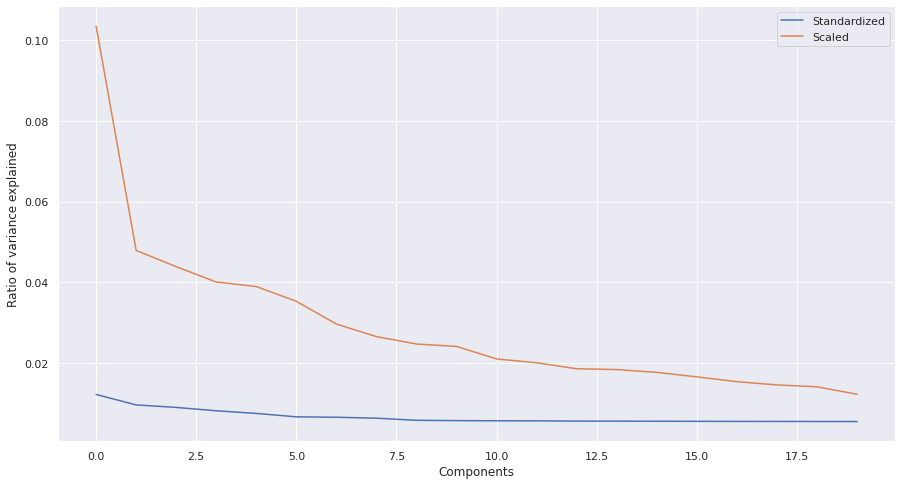

In [69]:
#Comparamos  la razón de la varianza explicada para la muestra estandarizada y la muestra escalada. 

sns.lineplot(x=range(pca_std.n_components),
                 y=pca_std.explained_variance_ratio_, label='Standardized')
sns.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_, label='Scaled')
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
plt.legend()

La figura "Ratio of variance explained" vs "Components" muestra que el método de escalonado explica en mayor porcentaje los datos. La función que representa el tratamiento de escalonado muestra también un punto de quiebre, denominado *elbow point*, el cual proporciona el número ótimo de componentes a tomar, en este caso vemos que el punto se da en PC2. De acuerdo a esta definición, nos quedamos con las dos primeras componentes, las cuales sumamos a la tabla original.

In [70]:
melb_data_mice_knn[['pca1_scaled', 'pca2_scaled']] = proyected_features[:,:2]  #agregamos las dos columnas con las primeras componentes a la matrix original.

In [71]:
melb_data_mice_knn.info() #corroboramos que ya se sumaron las columnas con PC1 y PC2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11418 entries, 0 to 11417
Columns: 363 entries, Type=h to pca2_scaled
dtypes: float64(363)
memory usage: 31.6 MB


Para usar Type como parametro "hue" primnero debemos crear una unica columna que llamaremos Type que contenga toda la información, en donde ahora Type=h=1,Type=u=2 y Type=t=3. 

In [72]:
melb_data_mice_knn['Type'] = (melb_data_mice_knn['Type=h'] + melb_data_mice_knn['Type=u'] * 2 + melb_data_mice_knn['Type=t'] * 3)
print(melb_data_mice_knn)

       Type=h  Type=t  Type=u  Suburb=Abbotsford  Suburb=Aberfeldie  \
0         1.0     0.0     0.0                1.0                0.0   
1         1.0     0.0     0.0                1.0                0.0   
2         1.0     0.0     0.0                1.0                0.0   
3         1.0     0.0     0.0                1.0                0.0   
4         1.0     0.0     0.0                1.0                0.0   
...       ...     ...     ...                ...                ...   
11413     1.0     0.0     0.0                0.0                0.0   
11414     1.0     0.0     0.0                0.0                0.0   
11415     1.0     0.0     0.0                0.0                0.0   
11416     1.0     0.0     0.0                0.0                0.0   
11417     1.0     0.0     0.0                0.0                0.0   

       Suburb=Airport West  Suburb=Albanvale  Suburb=Albert Park  \
0                      0.0               0.0                 0.0   
1          

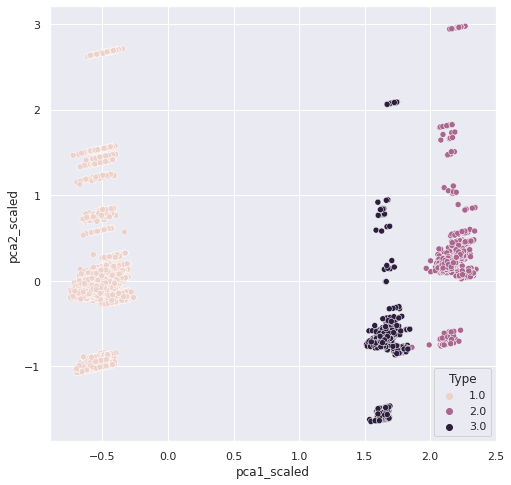

In [73]:
data_type = melb_data_mice_knn
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=data_type, x='pca1_scaled', y='pca2_scaled',
                    hue='Type')  # 'Landsize' 'Price' 'YearBuilt'

Este gráfico muestra claramente 3 grupos correspondientes los 3 valores posibles de la variable **type**. Vemos un único grupo a la izquierda correspondiente a Type=1=h, y dos grupos diferenciados a la derecha , siendo que Type=3=t se encuentra mas a la izquierda que Type=2=u.

Recordamos la definición de los **type**

>Type=1=h - house,cottage,villa, semi,terrace; 

>Type=2=u - unit, duplex; 

>Type=3=t - townhouse; dev site - development site; o res - other residential.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


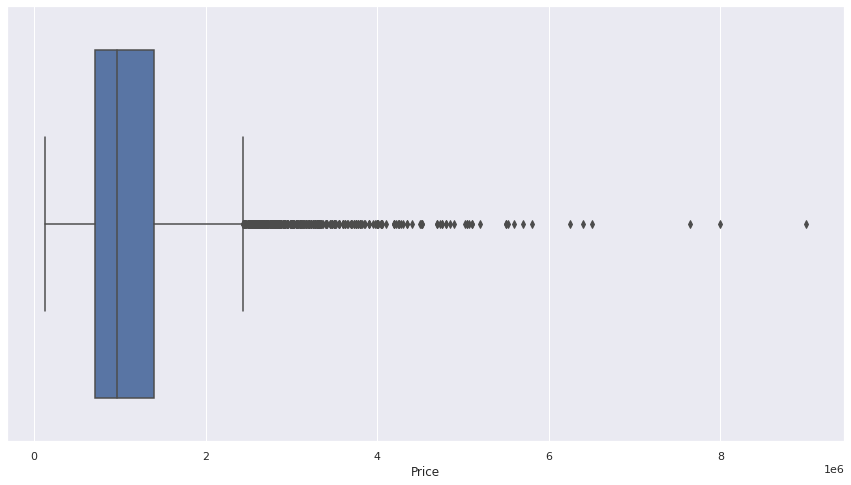

In [74]:
# Veamos cómo se comporta el plot pc1 vs pc2 con otras variables, primeramente usamos boxplot con el  precio para ver los limites y outliers para luego graficar.
sns.boxplot(melb_data_mice_knn.Price)

In [75]:
melb_data_mice_knn.Price.describe()

count    1.141800e+04
mean     1.144414e+06
std      6.441807e+05
min      1.310000e+05
25%      7.100000e+05
50%      9.700000e+05
75%      1.400000e+06
max      9.000000e+06
Name: Price, dtype: float64

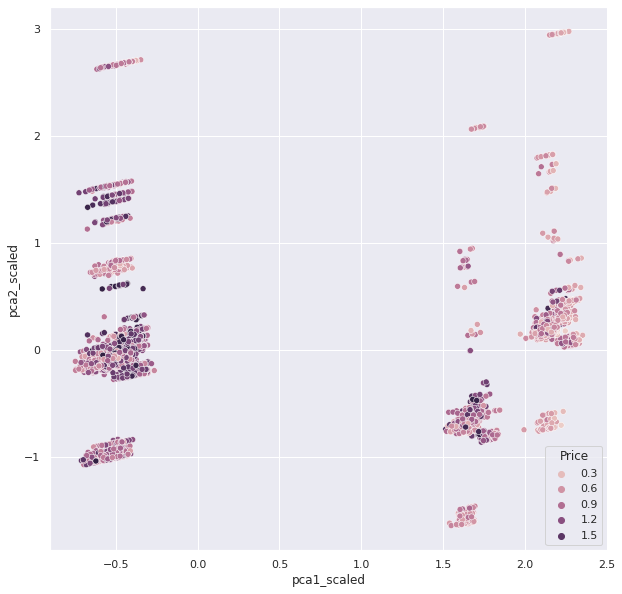

In [76]:
data = melb_data_mice_knn[melb_data_mice_knn.Price > 130000 ] # ver que cambia un poco con el n
data = melb_data_mice_knn[melb_data_mice_knn.Price < 1800000] # ver que cambia un poco con el n
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='pca1_scaled', y='pca2_scaled',
                    hue='Price')  # 'Landsize' 'Price' 'YearBuilt'

De esta figura se desprenden que el grupo de la izquierda (type=1) presenta precios mayores que los otros dos tipos. A su vez el Type=2 presenta precios mayores que el Tyoe= 3 en promedio.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


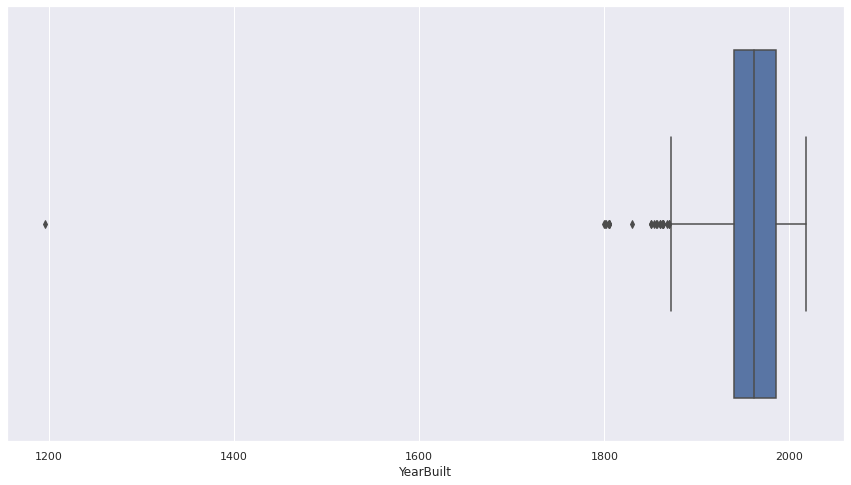

In [77]:
# Veamos cómo se comporta el precio para ver los limites y outliers
sns.boxplot(melb_data_mice_knn.YearBuilt)

In [78]:
melb_data_mice_knn.YearBuilt.describe()

count    11418.000000
mean      1960.420774
std         34.674385
min       1196.000000
25%       1940.000000
50%       1961.200000
75%       1985.600000
max       2018.000000
Name: YearBuilt, dtype: float64

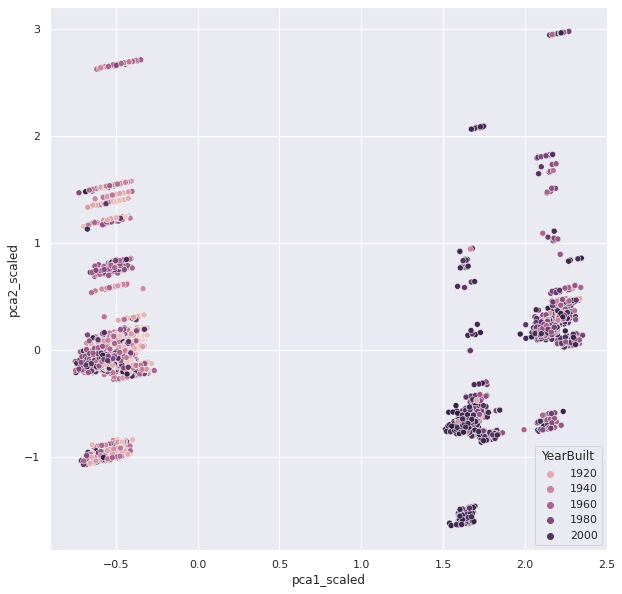

In [79]:
data_year = melb_data_mice_knn[melb_data_mice_knn.YearBuilt > 1900]
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_year, x='pca1_scaled', y='pca2_scaled',
                    hue='YearBuilt')  # 'Landsize' 'Price' 'YearBuilt'

Respesto al año de cosntrucción se observa que el grupo correspondiente a Type=1 inmuebles mas antiguos, y el type=3 a los mas recientes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


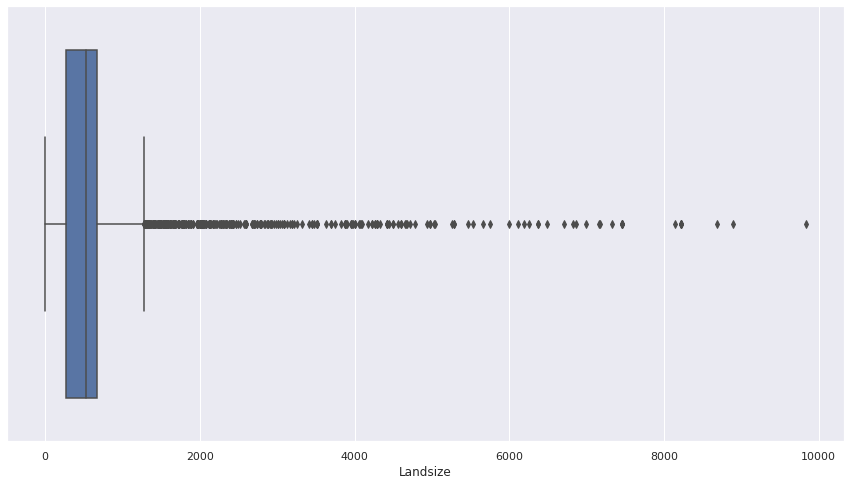

In [80]:
# Veamos cómo se comporta el precio para ver los limites y outliers
sns.boxplot(melb_data_mice_knn.Landsize)

In [81]:
melb_data_mice_knn.Landsize.describe()

count    11418.000000
mean       554.935015
std        553.767452
min          1.000000
25%        269.000000
50%        531.000000
75%        672.750000
max       9838.000000
Name: Landsize, dtype: float64

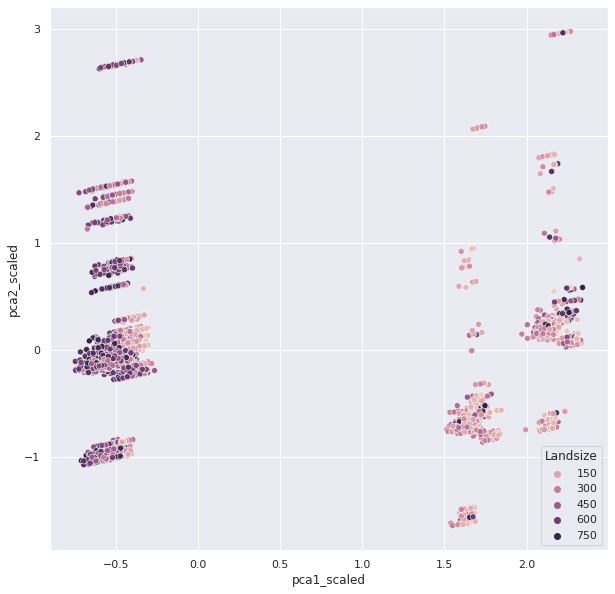

In [82]:
data_lsize = melb_data_mice_knn[melb_data_mice_knn.Landsize < 800]
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_lsize, x='pca1_scaled', y='pca2_scaled',
                    hue='Landsize')  # 'Landsize' 'Price' 'YearBuilt'

Esta figura muestra claramente que el grupo de los Type=1 poseen mayor superficie que los otros dos grupos, siendo Type=3 los de menor tamaño promedio.

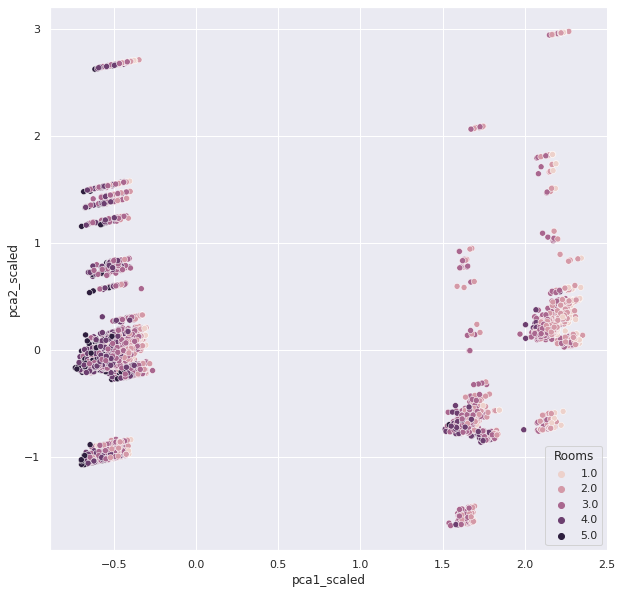

In [83]:

data_rooms = melb_data_mice_knn[melb_data_mice_knn.Rooms < 6]
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_rooms, x='pca1_scaled', y='pca2_scaled',
                    hue='Rooms')  # 'Landsize' 'Price' 'YearBuilt'

**Hue= Rooms**. Esta figura muestra  que el grupo de los Type=1 poseen mayor número de ambientes que los otros dos grupos, seguidos por Type=3,AnalizamosAAaaaAaasiendo Type=2  el que posee menos ambientes.
dñ


Del análisis de todos estos gráficos se observa que:

- Existe una clara división por la variable Type,donde están bien definidos los 3 grupos, siendo que el grupo Type=2 y Type=3 están mas cercanos en varias variables. Cada grupo muestra pequeñas aglomeraciones.

- **Type 1**: presenta los precios mas altos, mas ambientes, mayor tamaño de superficie y  propiedades mas antiguas.

- **Type 2**: presenta  una distribicón de precio bajos, presenta propiedades modernas, poseen en promedio pocos ambientes y su sidtribución de superficie muestra un variado tamaño de superficie.

- **Type 3**:  valores intermedio en precios y número de ambientes, a la vez son los que presentan menos superficie y los mas jóvenes.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [84]:
melbFinal_df = melb_data_mice_knn

In [85]:
melbFinal_df #corroboramos que al data ser original se le ha sumado las componentes pc1, pca 2 y la nueva columna Type

,Type=h,Type=t,Type=u,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,...,Lattitude,Longtitude,price_avg,price_min,price_max,BuildingArea,YearBuilt,pca1_scaled,pca2_scaled,Type
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-37.79960,144.99840,130.624031,28.0,900.0,91.8,1906.0,-0.441563,0.006387,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-37.80790,144.99340,130.624031,28.0,900.0,79.0,1900.0,-0.388178,0.021038,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-37.80930,144.99440,130.624031,28.0,900.0,150.0,1900.0,-0.416921,0.007747,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-37.79690,144.99690,130.624031,28.0,900.0,127.0,1932.4,-0.457794,-0.005677,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-37.80720,144.99410,130.624031,28.0,900.0,142.0,2014.0,-0.520467,-0.023471,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11413,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-37.67917,144.89390,92.285714,40.0,281.0,144.4,1986.0,-0.571530,-0.090698,1.0
11414,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-37.90562,145.16761,124.026455,0.0,599.0,168.4,1981.0,-0.545407,-0.060863,1.0
11415,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-37.85927,144.87904,191.094595,60.0,995.0,133.0,1995.0,-0.548376,-0.102347,1.0
11416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-37.85274,144.88738,191.094595,60.0,995.0,203.8,1997.0,-0.647958,-0.131034,1.0


In [86]:
# Guardamos el data frame en archivo
melbFinal_df.to_csv("data_frame_EyCD_Parte_2.csv", index=None)
from google.colab import files 
files.download('data_frame_EyCD_Parte_2.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```


La documentación está en un archivo aparte en formato markdown.